## Load Libraries

In [316]:
import numpy as np
import pandas as pd
import time
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [317]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [318]:
import cv2
import matplotlib.pyplot as plt

## Testing something

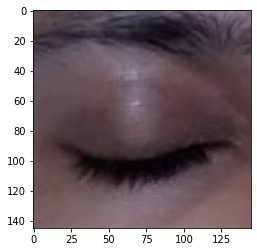

In [6]:
plt.imshow(plt.imread("../train/Closed/_0.jpg"))

In [280]:
image1 = cv2.imread("../train/yawn/77.jpg")

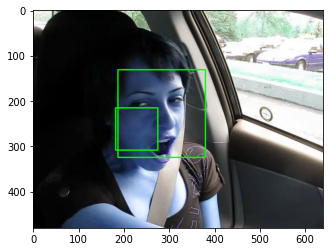

In [291]:
plt.imshow(image1)

In [292]:
face = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

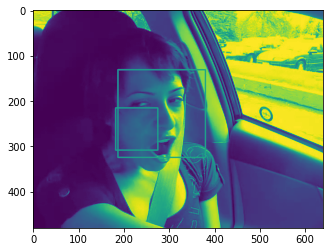

In [293]:
plt.imshow(face)

In [284]:
classf = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [285]:
faces = classf.detectMultiScale(face)

In [286]:
faces

array([[182, 215,  93,  93],
       [187, 131, 193, 193]])

In [287]:
yaw_no=[]

In [288]:
for (x, y, w, h) in faces:
    img = cv2.rectangle(image1, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_color = img[y:y+h, x:x+w]
    resized_array = cv2.resize(roi_color, (145, 145))
    yaw_no.append(resized_array)

In [289]:
len(yaw_no)

2

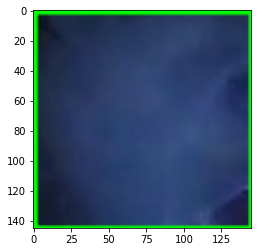

In [290]:
plt.imshow(yaw_no[0])

## Load eye

In [7]:
def loadall(folder):
    list=[]
    names = os.listdir(folder)
    for i in names:
        a = cv2.imread(folder+"/"+i)
        a1 = cv2.resize(a, (150, 150))
        b=a1/255.0
        list.append(b)
    return list

In [8]:
openeye=loadall("../train/Open")

In [9]:
closeye=loadall("../train/Closed")

In [10]:
len(openeye)

726

In [11]:
len(closeye)

726

In [12]:
y1=np.ones(len(openeye))

In [13]:
y0=np.zeros(len(closeye))

In [14]:
y=np.concatenate((y0,y1),axis=0)

In [15]:
x=closeye+openeye

In [16]:
xx=np.array(x)

In [17]:
len(y)

1452

In [18]:
len(xx)

1452

In [19]:
X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size = 0.25, random_state = 5)

In [20]:
len(X_test)

363

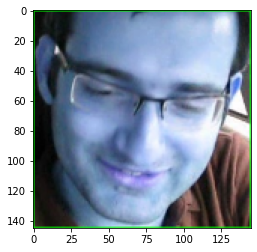

In [237]:
plt.imshow(X_train_yface[8])

In [264]:
X_train_yface[8].shape

(145, 145, 3)

In [141]:
X_train[1].shape

(150, 150, 3)

## Load yawn full image

In [147]:
def loadyfull(folder):
    list=[]
    names = os.listdir(folder)
    for i in names:
        a = plt.imread(folder+"/"+i)
        a1 = cv2.resize(a, (200, 200))
        b=a1/255.0
        list.append(b)
    return list

In [148]:
openy=loadyfull("../train/yawn")
closey=loadyfull("../train/no_yawn")

In [149]:
y1=np.ones(len(openy))

In [150]:
y0=np.zeros(len(closey))

In [151]:
y=np.concatenate((y0,y1),axis=0)

In [152]:
x=closey+openy

In [154]:
xx=np.array(x)

In [155]:
len(y)

1448

In [156]:
len(xx)

1448

In [157]:
X_train_yfull, X_test_yfull, y_train_yfull, y_test_yfull = train_test_split(xx, y, test_size = 0.25, random_state = 5)

## Load yawn only face

In [211]:
classf = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [267]:
def big(arr):
    big=0
    for i in arr:
        size=i.shape[0]*i.shape[1]
        if(size>big):
            bigimg=i
            big=size
    return bigimg

In [270]:
def loadface(folder):
    list=[]
    names = os.listdir(folder)
    for i in names:
        a = cv2.imread(folder+"/"+i)
        faces = classf.detectMultiScale(a)
        yawn=[]
        for (x, y, w, h) in faces:
            img = cv2.rectangle(a, (x, y), (x+w, y+h), (0, 255, 0), 2)
            face_array = img[y:y+h, x:x+w]
            yawn.append(face_array)
        if(len(yawn)!=0):
            a1 = cv2.resize(big(yawn), (120, 120))
            b=a1/255.0
            list.append(b)
    return list

In [271]:
openy=loadface("../train/yawn")
closey=loadface("../train/no_yawn")

In [272]:
y1=np.ones(len(openy))
y0=np.zeros(len(closey))

In [273]:
y=np.concatenate((y0,y1),axis=0)

In [274]:
x=closey+openy

In [275]:
xx=np.array(x)

In [276]:
len(y)

1019

In [277]:
X_train_yface, X_test_yface, y_train_yface, y_test_yface = train_test_split(xx, y, test_size = 0.25, random_state = 5)

## DL models

### CNN

In [32]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [311]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [312]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### ANN

In [313]:
modelr = Sequential()

modelr.add(Flatten())
modelr.add(Dense(256, activation='relu'))
modelr.add(Dropout(0.25))
modelr.add(Dense(1, activation='sigmoid'))

In [314]:
modelr.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train eye cnn

In [88]:
model.fit(X_train, y_train, epochs=10)
model.summary()

Epoch 1/10
35/35 [==============================] - 19s 548ms/step - loss: 10.9079 - accuracy: 0.7759
Epoch 2/10
35/35 [==============================] - 19s 546ms/step - loss: 3.0924 - accuracy: 0.8953
Epoch 3/10
35/35 [==============================] - 20s 571ms/step - loss: 0.9951 - accuracy: 0.9109
Epoch 4/10
35/35 [==============================] - 19s 548ms/step - loss: 0.4334 - accuracy: 0.9477
Epoch 5/10
35/35 [==============================] - 20s 573ms/step - loss: 0.2301 - accuracy: 0.9532
Epoch 6/10
35/35 [==============================] - 20s 579ms/step - loss: 0.1538 - accuracy: 0.9596
Epoch 7/10
35/35 [==============================] - 19s 540ms/step - loss: 0.0837 - accuracy: 0.9688
Epoch 8/10
35/35 [==============================] - 20s 579ms/step - loss: 0.1005 - accuracy: 0.9660
Epoch 9/10
35/35 [==============================] - 21s 602ms/step - loss: 0.0886 - accuracy: 0.9715
Epoch 10/10
35/35 [==============================] - 20s 571ms/step - loss: 0.0680 - accur

In [91]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

12/12 - 1s - loss: 0.1810 - accuracy: 0.9311

Test accuracy: 0.9311294555664062


In [92]:
y_pred = model.predict(X_test).ravel()

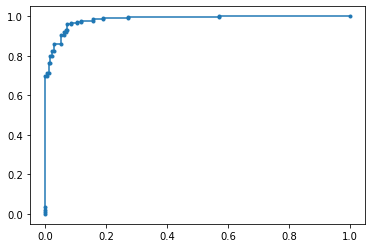

In [94]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [95]:
for i in range(len(y_pred)):
    if y_pred[i]<=0.5:
        y_pred[i]=0
    else:
        y_pred[i]=1
Tp=0
Tn=0
Fp=0
Fn=0
for i in range(len(y_test)):
    if(y_pred[i]==0):
        if(y_test[i]==0):
            Tn=Tn+1
        else:
            Fn=Fn+1
    else:
        if(y_test[i]==0):
            Fp=Fp+1
        else:
            Tp=Tp+1
print(Tp,Tn,Fp,Fn)
acc=(Tp+Tn)/len(y_test)
print(acc)

170 168 12 13
0.931129476584022


In [97]:
precision=Tp/(Tp+Fp)
print("precision:",precision)

precision: 0.9340659340659341


In [98]:
recall=Tp/(Tp+Fn)
print("recall:",recall)

recall: 0.9289617486338798


In [99]:
f1=2*precision*recall/(precision+recall)
print("fi score:",f1)

fi score: 0.9315068493150686


## Train eye ann

In [315]:
modelr.fit(X_train, y_train, epochs=10)
modelr.summary()

Epoch 1/10
35/35 [==============================] - 2s 57ms/step - loss: 5.4924 - accuracy: 0.7089
Epoch 2/10
35/35 [==============================] - 2s 56ms/step - loss: 0.7390 - accuracy: 0.8384
Epoch 3/10
35/35 [==============================] - 2s 54ms/step - loss: 0.2852 - accuracy: 0.8962
Epoch 4/10
35/35 [==============================] - 2s 53ms/step - loss: 0.3284 - accuracy: 0.8687
Epoch 5/10
35/35 [==============================] - 2s 53ms/step - loss: 0.3097 - accuracy: 0.8815
Epoch 6/10
35/35 [==============================] - 2s 55ms/step - loss: 0.2736 - accuracy: 0.9036
Epoch 7/10
35/35 [==============================] - 2s 54ms/step - loss: 0.3899 - accuracy: 0.8448
Epoch 8/10
35/35 [==============================] - 2s 55ms/step - loss: 0.3018 - accuracy: 0.8953
Epoch 9/10
35/35 [==============================] - 2s 54ms/step - loss: 0.4246 - accuracy: 0.8338
Epoch 10/10
35/35 [==============================] - 2s 54ms/step - loss: 0.2739 - accuracy: 0.8990
Model: "s

In [89]:
y_pred = modelr.predict(X_test).ravel()

In [72]:
for i in range(len(y_pred)):
    if y_pred[i]<=0.5:
        y_pred[i]=0
    else:
        y_pred[i]=1

In [73]:
Tp=0
Tn=0
Fp=0
Fn=0
for i in range(len(y_test)):
    if(y_pred[i]==0):
        if(y_test[i]==0):
            Tn=Tn+1
        else:
            Fn=Fn+1
    else:
        if(y_test[i]==0):
            Fp=Fp+1
        else:
            Tp=Tp+1
print(Tp,Tn,Fp,Fn)
acc=(Tp+Tn)/len(y_test)
print(acc)

150 171 9 33
0.8842975206611571


In [299]:
precision=150/(150+9)
print("precision:",precision)

precision: 0.9433962264150944


In [75]:
precision=Tp/(Tp+Fp)
print("precision:",precision
recall=Tp/(Tp+Fn)
print("recall:",recall)
f1=2*precision*recall/(precision+recall)
print("fi score:",f1)

recall: 0.819672131147541


In [76]:
f1=2*precision*recall/(precision+recall)
print("fi score:",f1)

fi score: 0.8771929824561403


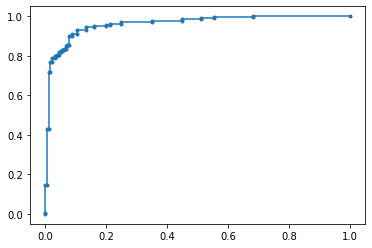

In [77]:
y_pred = modelr.predict(X_test).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

## yawn full image ann

In [183]:
modelr.fit(X_train_yfull, y_train_yfull, epochs=10)
modelr.summary()

Epoch 1/10
34/34 [==============================] - 3s 92ms/step - loss: 28.3114 - accuracy: 0.5497
Epoch 2/10
34/34 [==============================] - 3s 88ms/step - loss: 5.7390 - accuracy: 0.6280
Epoch 3/10
34/34 [==============================] - 3s 91ms/step - loss: 0.6811 - accuracy: 0.6602
Epoch 4/10
34/34 [==============================] - 3s 90ms/step - loss: 0.5623 - accuracy: 0.6759
Epoch 5/10
34/34 [==============================] - 3s 90ms/step - loss: 0.5393 - accuracy: 0.6906
Epoch 6/10
34/34 [==============================] - 3s 94ms/step - loss: 0.5340 - accuracy: 0.7081
Epoch 7/10
34/34 [==============================] - 3s 88ms/step - loss: 0.4987 - accuracy: 0.7320
Epoch 8/10
34/34 [==============================] - 3s 93ms/step - loss: 0.5048 - accuracy: 0.7311
Epoch 9/10
34/34 [==============================] - 3s 90ms/step - loss: 0.5049 - accuracy: 0.7505
Epoch 10/10
34/34 [==============================] - 3s 92ms/step - loss: 0.5253 - accuracy: 0.7210
Model: "

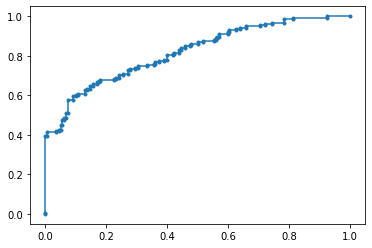

In [184]:
y_pred = modelr.predict(X_test_yfull).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test_yfull, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [185]:
for i in range(len(y_pred)):
    if y_pred[i]<=0.5:
        y_pred[i]=0
    else:
        y_pred[i]=1
Tp=0
Tn=0
Fp=0
Fn=0
for i in range(len(y_test_yfull)):
    if(y_pred[i]==0):
        if(y_test[i]==0):
            Tn=Tn+1
        else:
            Fn=Fn+1
    else:
        if(y_test[i]==0):
            Fp=Fp+1
        else:
            Tp=Tp+1
print(Tp,Tn,Fp,Fn)
acc=(Tp+Tn)/len(y_test_yfull)
print(acc)

99 81 98 84
0.4972375690607735


In [186]:
precision=Tp/(Tp+Fp)
print("precision:",precision)
recall=Tp/(Tp+Fn)
print("recall:",recall)
f1=2*precision*recall/(precision+recall)
print("fi score:",f1)

precision: 0.5025380710659898
recall: 0.5409836065573771
fi score: 0.5210526315789473


## yawn full image cnn

In [205]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0007)

In [206]:
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [207]:
model.fit(X_train_yfull, y_train_yfull, epochs=10)
model.summary()

Epoch 1/10
34/34 [==============================] - 34s 999ms/step - loss: 7.9857 - accuracy: 0.5985
Epoch 2/10
34/34 [==============================] - 34s 1s/step - loss: 0.7880 - accuracy: 0.7403
Epoch 3/10
34/34 [==============================] - 33s 971ms/step - loss: 0.4495 - accuracy: 0.7965
Epoch 4/10
34/34 [==============================] - 33s 983ms/step - loss: 0.3263 - accuracy: 0.8573
Epoch 5/10
34/34 [==============================] - 33s 977ms/step - loss: 0.2883 - accuracy: 0.8831
Epoch 6/10
34/34 [==============================] - 34s 986ms/step - loss: 0.2351 - accuracy: 0.9190
Epoch 7/10
34/34 [==============================] - 33s 977ms/step - loss: 0.1791 - accuracy: 0.9300
Epoch 8/10
34/34 [==============================] - 33s 971ms/step - loss: 0.1667 - accuracy: 0.9411
Epoch 9/10
34/34 [==============================] - 33s 976ms/step - loss: 0.1158 - accuracy: 0.9586
Epoch 10/10
34/34 [==============================] - 33s 982ms/step - loss: 0.0901 - accuracy:

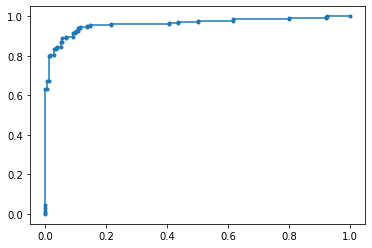

In [208]:
y_pred = model.predict(X_test_yfull).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test_yfull, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [210]:
for i in range(len(y_pred)):
    if y_pred[i]<=0.5:
        y_pred[i]=0
    else:
        y_pred[i]=1
Tp=0
Tn=0
Fp=0
Fn=0
for i in range(len(y_test_yfull)):
    if(y_pred[i]==0):
        if(y_test_yfull[i]==0):
            Tn=Tn+1
        else:
            Fn=Fn+1
    else:
        if(y_test_yfull[i]==0):
            Fp=Fp+1
        else:
            Tp=Tp+1
print(Tp,Tn,Fp,Fn)
acc=(Tp+Tn)/len(y_test_yfull)
print("accuracy:",acc)
precision=Tp/(Tp+Fp)
print("precision:",precision)
recall=Tp/(Tp+Fn)
print("recall:",recall)
f1=2*precision*recall/(precision+recall)
print("fi score:",f1)

164 167 10 21
0.914364640883978
precision: 0.9425287356321839
recall: 0.8864864864864865
fi score: 0.913649025069638


## Train face ann

In [ ]:
X_train_yface

In [286]:
modelr.fit(X_train_yface, y_train_yface, epochs=10)
modelr.summary()

Epoch 1/10
24/24 [==============================] - 1s 34ms/step - loss: 5.5641 - accuracy: 0.5694
Epoch 2/10
24/24 [==============================] - 1s 34ms/step - loss: 2.5569 - accuracy: 0.6099
Epoch 3/10
24/24 [==============================] - 1s 35ms/step - loss: 0.8984 - accuracy: 0.6728
Epoch 4/10
24/24 [==============================] - 1s 34ms/step - loss: 0.6122 - accuracy: 0.6702
Epoch 5/10
24/24 [==============================] - 1s 36ms/step - loss: 0.5535 - accuracy: 0.6990
Epoch 6/10
24/24 [==============================] - 1s 36ms/step - loss: 0.5726 - accuracy: 0.6741
Epoch 7/10
24/24 [==============================] - 1s 34ms/step - loss: 0.5659 - accuracy: 0.6872
Epoch 8/10
24/24 [==============================] - 1s 34ms/step - loss: 0.5511 - accuracy: 0.6728
Epoch 9/10
24/24 [==============================] - 1s 34ms/step - loss: 0.5530 - accuracy: 0.6885
Epoch 10/10
24/24 [==============================] - 1s 33ms/step - loss: 0.5387 - accuracy: 0.7016
Model: "s

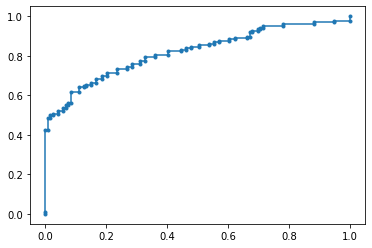

In [287]:
y_pred = modelr.predict(X_test_yface).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test_yface, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [288]:
for i in range(len(y_pred)):
    if y_pred[i]<=0.5:
        y_pred[i]=0
    else:
        y_pred[i]=1
Tp=0
Tn=0
Fp=0
Fn=0
for i in range(len(y_test_yface)):
    if(y_pred[i]==0):
        if(y_test_yface[i]==0):
            Tn=Tn+1
        else:
            Fn=Fn+1
    else:
        if(y_test_yface[i]==0):
            Fp=Fp+1
        else:
            Tp=Tp+1
print(Tp,Tn,Fp,Fn)
acc=(Tp+Tn)/len(y_test_yface)
print("accuracy:",acc)
precision=Tp/(Tp+Fp)
print("precision:",precision)
recall=Tp/(Tp+Fn)
print("recall:",recall)
f1=2*precision*recall/(precision+recall)
print("fi score:",f1)

94 97 22 42
accuracy: 0.7490196078431373
precision: 0.8103448275862069
recall: 0.6911764705882353
fi score: 0.746031746031746


## Train yawn face cnn

In [249]:
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [282]:
start_time = time.time()
model.fit(X_train_yface, y_train_yface, epochs=10)
elapsed_time = time.time() - start_time
print("Training Time  : {:.2}".format(elapsed_time))
model.summary()

Epoch 1/10
24/24 [==============================] - 8s 341ms/step - loss: 8.4703 - accuracy: 0.6322
Epoch 2/10
24/24 [==============================] - 8s 343ms/step - loss: 1.7978 - accuracy: 0.7474
Epoch 3/10
24/24 [==============================] - 8s 340ms/step - loss: 0.6572 - accuracy: 0.7919
Epoch 4/10
24/24 [==============================] - 8s 342ms/step - loss: 0.5369 - accuracy: 0.8534
Epoch 5/10
24/24 [==============================] - 9s 359ms/step - loss: 0.3060 - accuracy: 0.8665
Epoch 6/10
24/24 [==============================] - 8s 353ms/step - loss: 0.2634 - accuracy: 0.8652
Epoch 7/10
24/24 [==============================] - 8s 337ms/step - loss: 0.2069 - accuracy: 0.9149
Epoch 8/10
24/24 [==============================] - 8s 341ms/step - loss: 0.2070 - accuracy: 0.9175
Epoch 9/10
24/24 [==============================] - 8s 343ms/step - loss: 0.2007 - accuracy: 0.9136
Epoch 10/10
24/24 [==============================] - 8s 341ms/step - loss: 0.1729 - accuracy: 0.9202

In [283]:
test_loss, test_acc = model.evaluate(X_test_yface,  y_test_yface, verbose=2)

print('\nTest accuracy:', test_acc)

8/8 - 0s - loss: 0.4115 - accuracy: 0.7686

Test accuracy: 0.7686274647712708


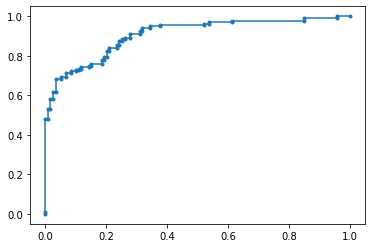

In [284]:
y_pred = model.predict(X_test_yface).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test_yface, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [285]:
for i in range(len(y_pred)):
    if y_pred[i]<=0.5:
        y_pred[i]=0
    else:
        y_pred[i]=1
Tp=0
Tn=0
Fp=0
Fn=0
for i in range(len(y_test_yface)):
    if(y_pred[i]==0):
        if(y_test_yface[i]==0):
            Tn=Tn+1
        else:
            Fn=Fn+1
    else:
        if(y_test_yface[i]==0):
            Fp=Fp+1
        else:
            Tp=Tp+1
print(Tp,Tn,Fp,Fn)
acc=(Tp+Tn)/len(y_test_yface)
print("accuracy:",acc)
precision=Tp/(Tp+Fp)
print("precision:",precision)
recall=Tp/(Tp+Fn)
print("recall:",recall)
f1=2*precision*recall/(precision+recall)
print("fi score:",f1)

79 117 2 57
accuracy: 0.7686274509803922
precision: 0.9753086419753086
recall: 0.5808823529411765
fi score: 0.7281105990783411


In [289]:
import matplotlib.pyplot as plt

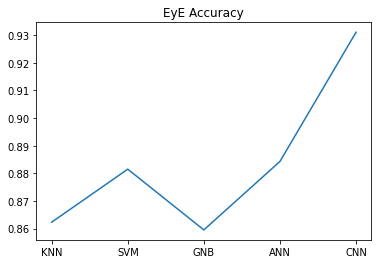

In [294]:
model = ["KNN","SVM","GNB","ANN","CNN"]
value = [0.8623,0.8815,0.8595,0.8843,0.9311]
plt.title('EyE Accuracy')  
plt.plot(model, value)
plt.show()

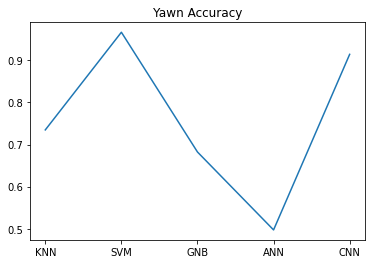

In [310]:
model = ["KNN","SVM","GNB","ANN","CNN"]
value = [0.7348,0.9668,0.6823,0.4972,0.9143]
plt.title('Yawn Accuracy')  
plt.plot(model, value)
plt.show()

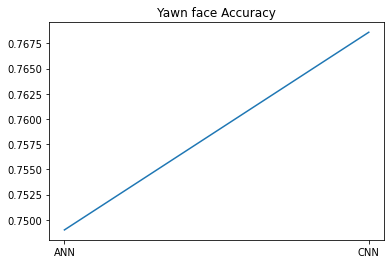

In [298]:
model = ["ANN","CNN"]
value = [0.7490,0.7686]
plt.title('Yawn face Accuracy')  
plt.plot(model, value)
plt.show()

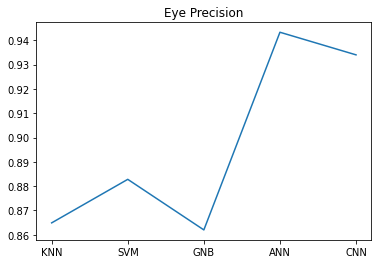

In [301]:
model = ["KNN","SVM","GNB","ANN","CNN"]
value = [0.8649,0.8828,0.8620,0.9433,0.9340]
plt.title('Eye Precision')
plt.plot(model, value)
plt.show()

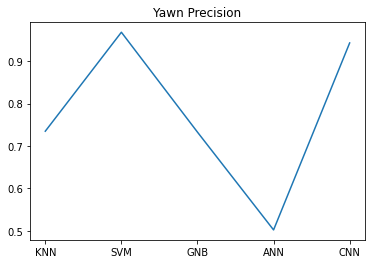

In [302]:
model = ["KNN","SVM","GNB","ANN","CNN"]
value = [0.7348,0.9677,0.7326,0.5025,0.9425]
plt.title('Yawn Precision')
plt.plot(model, value)
plt.show()

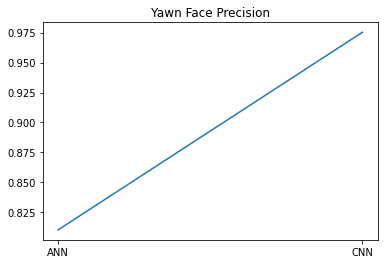

In [303]:
model = ["ANN","CNN"]
value = [0.8103,0.9753]
plt.title('Yawn Face Precision')
plt.plot(model, value)
plt.show()

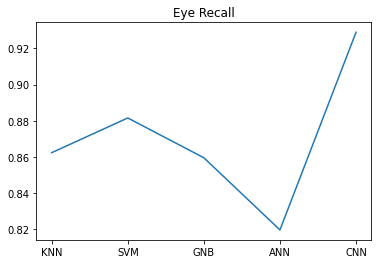

In [300]:
model = ["KNN","SVM","GNB","ANN","CNN"]
value = [0.8623,0.8815,0.8595,0.8196,0.9289]
plt.title('Eye Recall')
plt.plot(model, value)
plt.show()

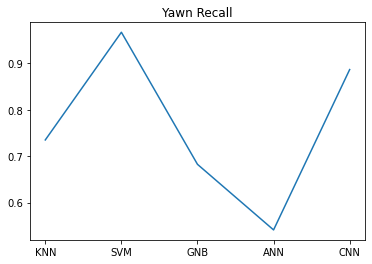

In [304]:
model = ["KNN","SVM","GNB","ANN","CNN"]
value = [0.7348,0.9668,0.6823,0.5410,0.8864]
plt.title('Yawn Recall')
plt.plot(model, value)
plt.show()

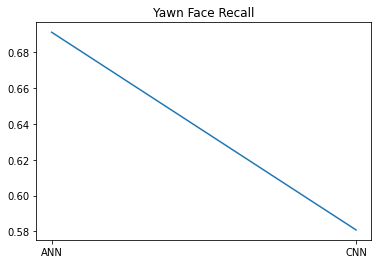

In [305]:
model = ["ANN","CNN"]
value = [0.6911,0.5808]
plt.title('Yawn Face Recall')
plt.plot(model, value)
plt.show()

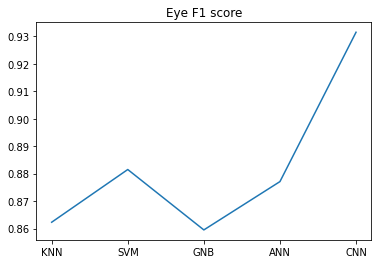

In [307]:
model = ["KNN","SVM","GNB","ANN","CNN"]
value = [0.8623,0.8815,0.8595,0.8771,0.9315]
plt.title('Eye F1 score')
plt.plot(model, value)
plt.show()

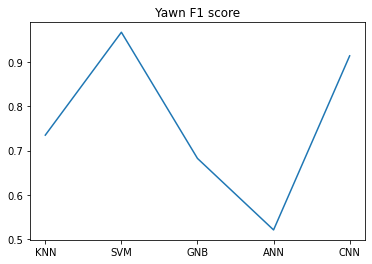

In [308]:
model = ["KNN","SVM","GNB","ANN","CNN"]
value = [0.7348,0.9668,0.6823,0.5211,0.9136]
plt.title('Yawn F1 score')
plt.plot(model, value)
plt.show()

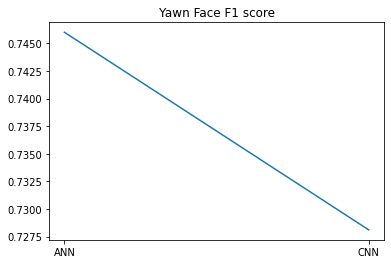

In [309]:
model = ["ANN","CNN"]
value = [0.7460,0.7281]
plt.title('Yawn Face F1 score')
plt.plot(model, value)
plt.show()